## Первая лабораторная работа
Логвинов Денис Олесандрович 

студент групи КА-01

варіант 14

Подключаю библиотеки для более удобного написания кода.

In [1]:
from sympy import gcd, diff, simplify, Poly, nroots
from sympy.abc import x
import sympy  
from functools import reduce 
import numpy as np 
import matplotlib.pyplot as plt
from collections.abc import Callable 
from scipy.optimize import fsolve

Сюда ввожу нужное уравнение, затем убираю корни так, что бы остались только кратности один

In [2]:
P = x**7-26*x**6-84*x**5+555*x**4+499*x**3-991*x**2-838*x-1
P = simplify(P/gcd(P, diff(P, x))) 
P

x**7 - 26*x**6 - 84*x**5 + 555*x**4 + 499*x**3 - 991*x**2 - 838*x - 1

Функция которая находить промежутке где расположены корни, которая использует две теоремы - про оценку модулей корней уравнения (с курса численных методов) и теорему про оценку на minimal real root separation, которое определенно как $rsep (P) = \min\{|\lambda_i - \lambda_j| \text{for real } \lambda_i \neq \lambda_j\}$ [тут](https://www.ams.org/journals/mcom/1979-33-145/S0025-5718-1979-0514828-8/S0025-5718-1979-0514828-8.pdf).   

**Теорема** Пусть $P$ будет произвольный полином с целыми коэффициентами размера s (сумма модулей его коэффициентов) и степени n. Тогда 
$$rsep (P) > \frac{2 * \sqrt{2}}{n^{\frac{n}{2}+1}\cdot (s+1)^n} $$ 

In [3]:
def IntervalsOfRoots(P: sympy.core.add.Add, rsep_correction: float=0.001, max_root: float=50) -> list[tuple[int]]:
    # что бы сделать полином целым (нахожу тут множитель)
    def Multiplier(l: list) -> int:
        M = 1
        for i in l: 
            temp = 0
            while np.floor(i)!=i:
                i*=10
                temp+=1
            if M<temp: 
                M = temp
        return 10**M/reduce(lambda x, y: np.gcd(x, y), map(lambda x: (10**M)*x, l))
    
    Mult = Multiplier(P.as_poly(domain = "CC").all_coeffs())
    P = simplify(Mult*P)
    print(P)
    s = reduce(lambda x, y: abs(x)+abs(y), P.as_poly(domain = "CC").all_coeffs())
    n = P.as_poly(domain = "CC").degree()
    # из-за того что это питон и у меня не супер компьютер)
    rsep = 2*1.4/(n**(0.5*n+1)*(s+1)**n)
    if rsep < rsep_correction:
        rsep = rsep_correction 
    A = np.max(list(map(lambda x: abs(x), P.as_poly(domain = "CC").all_coeffs()[1:])))
    l = [] 
    # из-за того что это питон и у меня не супер компьютер)
    t = U = 1+A/P.as_poly(domain = "CC").all_coeffs()[0]
    if 1+A/P.as_poly(domain = "CC").all_coeffs()[0] > max_root: 
        U = max_root
    # U = 1+A/P.as_poly(domain = "CC").all_coeffs()[0]
    print(f"верхний предел корня для табуляции - {U}, шаг табуляции - {rsep}")
    print(f"верхний предел корня по теорема из лекции - {t}, оценка на вещественое отделение по теореме выше - {2*1.4/(n**(0.5*n+1)*(s+1)**n)}")
    print("Тогда промежутки для корней:")
    for i in np.arange(-U, U, rsep):
        if P.evalf(subs={x:i})*P.evalf(subs={x:i+rsep}) <= 0:
            l.append((i, i+rsep))
    return l
    

Вызываю функцию с параметрами так, как используемых теорем не хватает и приходится слишком много считать. Как видим найдены все 7 корней.

In [4]:
roots = IntervalsOfRoots(P, rsep_correction=0.1, max_root=30)
fP = lambda y: P.evalf(subs={x:y})
fPp = lambda y: diff(P, x).evalf(subs={x:y})
roots 

1.0*x**7 - 26.0*x**6 - 84.0*x**5 + 555.0*x**4 + 499.0*x**3 - 991.0*x**2 - 838.0*x - 1.0
верхний предел корня для табуляции - 30, шаг табуляции - 0.1
верхний предел корня по теорема из лекции - 992.000000000000, оценка на вещественое отделение по теореме выше - 2.03434304304948E-28
Тогда промежутки для корней:


[(-5.299999999999649, -5.199999999999649),
 (-1.2999999999995921, -1.199999999999592),
 (-0.8999999999995865, -0.7999999999995865),
 (-0.0999999999995751, 4.2491010709966304e-13),
 (1.4000000000004462, 1.5000000000004463),
 (3.6000000000004775, 3.7000000000004776),
 (28.200000000000827, 28.30000000000083)]

И график полинома

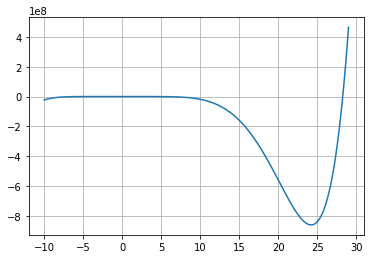

In [26]:
ypppp = np.linspace(-10, 29, 10000)
temp = lambda x: x**7-26*x**6-84*x**5+555*x**4+499*x**3-991*x**2-838*x-1 # numpy - быстрый, sympy - медленный, sympy не поддерживает массивы numpy (хотя бы тут) 
plt.plot(ypppp, temp(ypppp))
plt.grid()
plt.show() 

Теперь к трансцендентному уравнению

$$1.8 x^2 - \sin(10x) = 0$$

Видно, что для $|x| \geq 1$ корней нет. Найду остальные корни с помощью графика функции $f(x) = 1.8 x^2 - \sin(10x)$

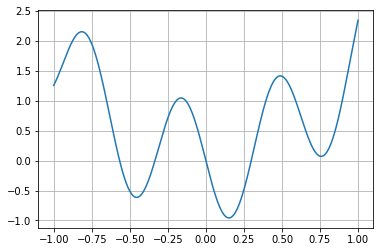

In [6]:
f = lambda x: 1.8*x*x - np.sin(10*x) 
fp = lambda x: 3.6*x - 10*np.cos(10*x) #f' (prime) 
y = np.linspace(-1, 1, 1000)
plt.plot(y, f(y))
plt.grid()
plt.show() 

Из картинки выше видно, что корни расположены не ближе чем на $0.05$ относительно друг друга и видно, что они не парной кратности. Поэтому применю метод табуляции как выше для многочлена 

In [7]:
rootsT = []
print("Корни расположены между точками:")
for i in np.arange(-1, 1, 0.05):
    if f(i)*f(i+0.05) <= 0:
        rootsT.append((i, i+0.05))
rootsT 

Корни расположены между точками:


[(-0.5999999999999996, -0.5499999999999996),
 (-0.3499999999999994, -0.29999999999999943),
 (-0.049999999999999156, 8.465450562766819e-16),
 (0.2500000000000011, 0.3000000000000011)]

### Метод половинного деления

In [8]:
def Half(f: Callable[[float], float], a: float, b: float, eps: float, stop: int = 10000, last_out: int = 10) -> float:
    if f(a) == 0:
        return a
    if f(b) == 0:
        return b
    if f(a)*f(b) > 0:
        raise ValueError("f(a) and f(b) have the same sign")
    # т.е. f(b)>0, f(a)<0 
    if f(b)<0:
        a, b = b, a
    i = 0 
    text = []
    while abs(b-a) > eps or abs(f((a+b)/2)) > eps:
        if len(text) >= last_out:
            text = text[1: ]
        if i > stop:
            raise RuntimeError("Too many operations")
        i+=1
        c = 0.5*(a+b)
        if f(c) == 0:
            text.append(f"{i}-я итерация и найден точный корень {c}")
            for sentence in text:
                print(sentence)
            return c
        elif f(c) > 0: 
            b = c
        else:
            a = c
        if a < b:
            text.append(f"{i}-я итерация с отрезком ({a}, {b}) и значениями функции в точках соответственно {f(a)} и {f(b)}")
        else:
            text.append(f"{i}-я итерация с отрезком ({b}, {a}) и значениями функции в точках соответственно {f(b)} и {f(a)}")
    for sentence in text: 
        print(sentence)
    return (b+a)/2 

Пример использования функции

In [9]:
print(Half(f, -0.6, -0.5, 0.00001)) 

6-я итерация с отрезком (-0.5671875, -0.565625) и значениями функции в точках соответственно 0.0051220295849809805 и -0.010788685867924475
7-я итерация с отрезком (-0.5671875, -0.56640625) и значениями функции в точках соответственно 0.0051220295849809805 и -0.0028521366759288735
8-я итерация с отрезком (-0.566796875, -0.56640625) и значениями функции в точках соответственно 0.0011302686083571878 и -0.0028521366759288735
9-я итерация с отрезком (-0.566796875, -0.5666015625) и значениями функции в точках соответственно 0.0011302686083571878 и -0.0008621065365278513
10-я итерация с отрезком (-0.56669921875, -0.5666015625) и значениями функции в точках соответственно 0.0001337882900506182 и -0.0008621065365278513
11-я итерация с отрезком (-0.56669921875, -0.566650390625) и значениями функции в точках соответственно 0.0001337882900506182 и -0.00036423235720284275
12-я итерация с отрезком (-0.56669921875, -0.5666748046875) и значениями функции в точках соответственно 0.0001337882900506182 и

Нахожу все корни двух уравнений

In [10]:
print(f"Roots of {P}")
print("_____________________________") 
for a, b in roots:
    # print(a, b)
    print(f"Тогда примерно корень = {Half(fP, a, b, 0.00001, last_out=0)}")
    print("_____________________________") 
print(f"Roots of 1.8 x**2 - sin(10x)")
print("_____________________________") 
for a, b in rootsT:
    # print(a, b)
    print(f"Тогда примерно корень = {Half(f, a, b, 0.00001, last_out=0)}")
    print("_____________________________") 

Roots of x**7 - 26*x**6 - 84*x**5 + 555*x**4 + 499*x**3 - 991*x**2 - 838*x - 1
_____________________________
29-я итерация с отрезком (-5.288603526353485, -5.288603526167221) и значениями функции в точках соответственно -0.0000129897706422812 и 0.0000229846207278589
Тогда примерно корень = -5.288603526260353
_____________________________
19-я итерация с отрезком (-1.2096673965450022, -1.209667205810139) и значениями функции в точках соответственно 0.0000534753425749799 и -0.0000710413174743984
Тогда примерно корень = -1.2096673011775705
_____________________________
20-я итерация с отрезком (-0.8638978004451431, -0.8638977050777115) и значениями функции в точках соответственно -0.0000107733350977517 и 0.0000277734561414957
Тогда примерно корень = -0.8638977527614273
_____________________________
20-я итерация с отрезком (-0.0011950492854637621, -0.0011949539180321214) и значениями функции в точках соответственно 0.0000351611974633907 и -0.0000445306296294092
Тогда примерно корень = -0.

### Метод хорд

In [11]:
def Secant(f: Callable[[float], float], a: float, b: float, eps: float, stop: int = 10000, last_out: int = 10) -> float:
    """
    should check whether it would converge
    """  
    if f(a) == 0:
        return a 
    if f(b) == 0:
        return b
    if f(a)*f(b) > 0:
        raise ValueError("f(a) and f(b) have the same sign")
    if b<a:
        a, b = b, a
    i = 0 
    text = []
    g = lambda x, a: x - f(x)*(x-a)/(f(x)-f(a)) 
    x = g(b, a)
    while abs(x-b) > eps or abs(f(x)) > eps:
        if len(text) >= last_out:
            text = text[1: ] 
        if i > stop:
            raise RuntimeError("Too many operations")
        i+=1
        b = x
        x = g(x, a) 
        # b, x = x, g(x, a)
        if f(x) == 0:
            text.append(f"{i}-я c приближением (xk, f(xk)) = ({x}, {f(x)}), т.е. точный корень")
            for sentence in text:
                print(sentence)
            return x
        text.append(f"{i}-я c приближением (xk, f(xk)) = ({x}, {f(x)})")
    for sentence in text: 
        print(sentence) 
    return x 

Пример использования функции

In [12]:
print(Secant(f, -0.13, 0.1, 0.00001)) 

1-я c приближением (xk, f(xk)) = (0.0013565313624836189, -0.013561585266411696)
2-я c приближением (xk, f(xk)) = (-0.0004115405808836803, 0.004115699050209815)
3-я c приближением (xk, f(xk)) = (0.00012726870494642875, -0.0012726575507137237)
4-я c приближением (xk, f(xk)) = (-3.912899493117283e-05, 0.00039129269526764273)
5-я c приближением (xk, f(xk)) = (1.2051973605552784e-05, -0.00012051947431364748)
6-я c приближением (xk, f(xk)) = (-3.7100267684519537e-06, 3.710029245174607e-05)
7-я c приближением (xk, f(xk)) = (1.1422732801405589e-06, -1.142273045253834e-05)
8-я c приближением (xk, f(xk)) = (-3.516739347373575e-07, 3.5167395699805275e-06)
-3.516739347373575e-07


Нахожу все корни двух уравнений

In [13]:
print(f"Roots of {P}") 
print("_____________________________") 
for a, b in roots:
    # print(a, b)
    print(f"Тогда примерно корень = {Secant(fP, a, b, 0.00001, last_out=0)}")
    print("_____________________________") 
print(f"Roots of 1.8 x**2 - sin(10x)")
print("_____________________________") 
for a, b in rootsT:
    # print(a, b)
    print(f"Тогда примерно корень = {Secant(f, a, b, 0.00001, last_out=0)}")
    print("_____________________________") 

Roots of x**7 - 26*x**6 - 84*x**5 + 555*x**4 + 499*x**3 - 991*x**2 - 838*x - 1
_____________________________
4-я c приближением (xk, f(xk)) = (-5.28860352627279, 0.00000259492957033008)
Тогда примерно корень = -5.28860352627279
_____________________________
10-я c приближением (xk, f(xk)) = (-1.20966730430745, -0.00000673974811735529)
Тогда примерно корень = -1.20966730430745
_____________________________
4-я c приближением (xk, f(xk)) = (-0.863897796929356, -0.00000935228100909292)
Тогда примерно корень = -0.863897796929356
_____________________________
5-я c приближением (xk, f(xk)) = (-0.00119499836249720, -0.00000739152690368441)
Тогда примерно корень = -0.00119499836249720
_____________________________
6-я c приближением (xk, f(xk)) = (1.47604824269289, -0.00000487914910559509)
Тогда примерно корень = 1.47604824269289
_____________________________
5-я c приближением (xk, f(xk)) = (3.63021183684606, -0.00000789142279520640)
Тогда примерно корень = 3.63021183684606
_________________

### Метод касательных

In [14]:
def Newton(f: Callable[[float], float], fp: Callable[[float], float], x0: float, eps: float, stop: int = 10000, last_out: int = 10) -> float:
    i = 0 
    text = [] 
    x1 = x0
    if (temp:=fp(x1))!=0:
        x1 = x1 - f(x1)/temp
    else: 
        raise ZeroDivisionError(f"Derivative equals to zero at {i} iteration at point {x1}") 
    while abs(x0-x1) > eps or abs(f(x1)) > eps:
        if len(text) >= last_out:
            text = text[1: ] 
        if i > stop:
            raise RuntimeError(f"Too many operations {i}")
        i+=1
        x0 = x1
        if (temp:=fp(x1))!=0:
            x1 = x1 - f(x1)/temp
        else:
            raise ZeroDivisionError(f"Derivative equals to zero at {i} iteration at point {x1}") 
        text.append(f"{i}-я c приближением (xk, f(xk)) = ({x1}, {f(x1)})")
    for sentence in text: 
        print(sentence)
    return x1 

Пример использования функции

In [15]:
Newton(f, fp, 0.1, 0.0001) 

1-я c приближением (xk, f(xk)) = (0.008919902869846702, -0.08893757449449358)
2-я c приближением (xk, f(xk)) = (-3.823457573963289e-05, 0.0003823483794695919)
3-я c приближением (xk, f(xk)) = (-2.6127217468523145e-10, 2.612721746975188e-09)


-2.6127217468523145e-10

Нахожу все корни двух уравнений

In [16]:
print(f"Roots of {P}") 
print("_____________________________") 
for a, b in roots:
    # print(a, b)
    print(f"Тогда примерно корень = {Newton(fP, fPp, (a+b)/2, 0.00001, last_out=0)}")
    print("_____________________________") 
print(f"Roots of 1.8 x**2 - sin(10x)") 
print("_____________________________") 
for a, b in rootsT:
    # print(a, b)
    print(f"Тогда примерно корень = {Newton(f, fp, (a+b)/2, 0.00001, last_out=0)}")
    print("_____________________________") 

Roots of x**7 - 26*x**6 - 84*x**5 + 555*x**4 + 499*x**3 - 991*x**2 - 838*x - 1
_____________________________
2-я c приближением (xk, f(xk)) = (-5.28860352629034, -7.94346469628324E-7)
Тогда примерно корень = -5.28860352629034
_____________________________
3-я c приближением (xk, f(xk)) = (-1.20966731463141, 6.77209624336630E-12)
Тогда примерно корень = -1.20966731463141
_____________________________
2-я c приближением (xk, f(xk)) = (-0.863897773791159, 1.82198320107791E-12)
Тогда примерно корень = -0.863897773791159
_____________________________
3-я c приближением (xk, f(xk)) = (-0.00119500720795807, -1.12496132161746E-16)
Тогда примерно корень = -0.00119500720795807
_____________________________
2-я c приближением (xk, f(xk)) = (1.47604824404020, 2.13812643793440E-9)
Тогда примерно корень = 1.47604824404020
_____________________________
2-я c приближением (xk, f(xk)) = (3.63021183663499, -3.51353985340870E-9)
Тогда примерно корень = 3.63021183663499
_____________________________
2-я c

### Проверка решения

Нахождения корней полинома с помощью библиотечных функций python. Тут сверх важно, что не с помощью **roots** ведь оно находит точные значения (см. документацию!!!).

In [17]:
x = sympy.symbols('x')
for i in Poly(P, x).nroots():
    print(i) 

-5.28860352628623
-1.20966731463140
-0.863897773791164
-0.00119500720795807
1.47604824403961
3.63021183663490
28.2571035412422


Нахожу корни для функции $f(x) = 1.8 x^2 - \sin(10x)$ (кортеж корней из предыдущего приближения графиком).

In [18]:
for i in (-0.58, -0.3, 0, 0.26):
    print(f"Приближения {i}, корень {fsolve(f, i)[0]}")

Приближения -0.58, корень -0.5666861029702928
Приближения -0.3, корень -0.3344295560199424
Приближения 0, корень 0.0
Приближения 0.26, корень 0.2980953185726226


### Вывод

Множеством всех корней уравнения $$1.8 x^2 - \sin(10x) = 0$$ есть <font size="3.5">$\{-0.5666861029702928, -0.3344295560199424, 0, 0.2980953185726226\}$</font>, а уравнения $$ x^{7} - 26 x^{6} - 84 x^{5} + 555 x^{4} + 499 x^{3} - 991 x^{2} - 838 x - 1 = 0 $$ есть <font size="3.5">$\{-5.28860352628623, -1.20966731463140, -0.863897773791164, -0.00119500720795807, 1.47604824403961, 3.63021183663490, 28.2571035412422\}$</font>. Так же можно заметить (с помощью ячеек, где выводятся все корни), что метод Ньютона достигает результата за меньшее число итераций, затем идет метод секущих и при заданных параметрах хуже всего проявил себя метод бисекций. 